In [1]:
#importing all the file
import PIL 
from PIL import ImageOps, ImageFont, ImageDraw
from PIL import Image

#opening and converting image to RGB format
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')


In [2]:
#function to format each pixel

def change(a=1,b=1,c=1):
    copy=image.copy()
    for i in range(copy.width):
        for j in range(copy.height):
            old_color=copy.getpixel((i,j))
            new_color=(int(old_color[0]*a),int(old_color[1]*b),int(old_color[2]*c))
            copy.putpixel((i,j),new_color)

    return copy

In [3]:
#appending the image returned by above function in three list
final1=[]
final2=[]
final3=[]
for b in [0.1,0.5,0.9]:
    image1=change(b,1,1)
    final1.append(image1)
    image2=change(1,b,1)
    final2.append(image2)
    image3=change(1,1,b)
    final3.append(image3)

In [4]:
#function to add text at the bottom
def tex(chan,lst):
    x=[]
    den=0.1
    for i in lst:

        image2 = ImageOps.expand(i, border=(0, 0, 0, 60))
        image2=image2.convert("RGBA")
        color=image2.getpixel((750,170))
        txt = Image.new("RGBA", image2.size, (255,255,255,0))
        fnt = ImageFont.truetype("readonly/fanwood-webfont.ttf", 55)
        d = ImageDraw.Draw(txt)
        d.text((0,460), "channel {} intensity {}".format(chan,den), font=fnt, fill=(color))
        out = Image.alpha_composite(image2, txt)
        x.append(out)
        den+=0.4
        
    return x

In [5]:
#calling the above function
chan0=tex(0,final1)
chan1=tex(1,final2)
chan2=tex(2,final3)

In [6]:
#merging all the list into one using extend function
final=[]
final.extend(chan0)
final.extend(chan1)
final.extend(chan2)

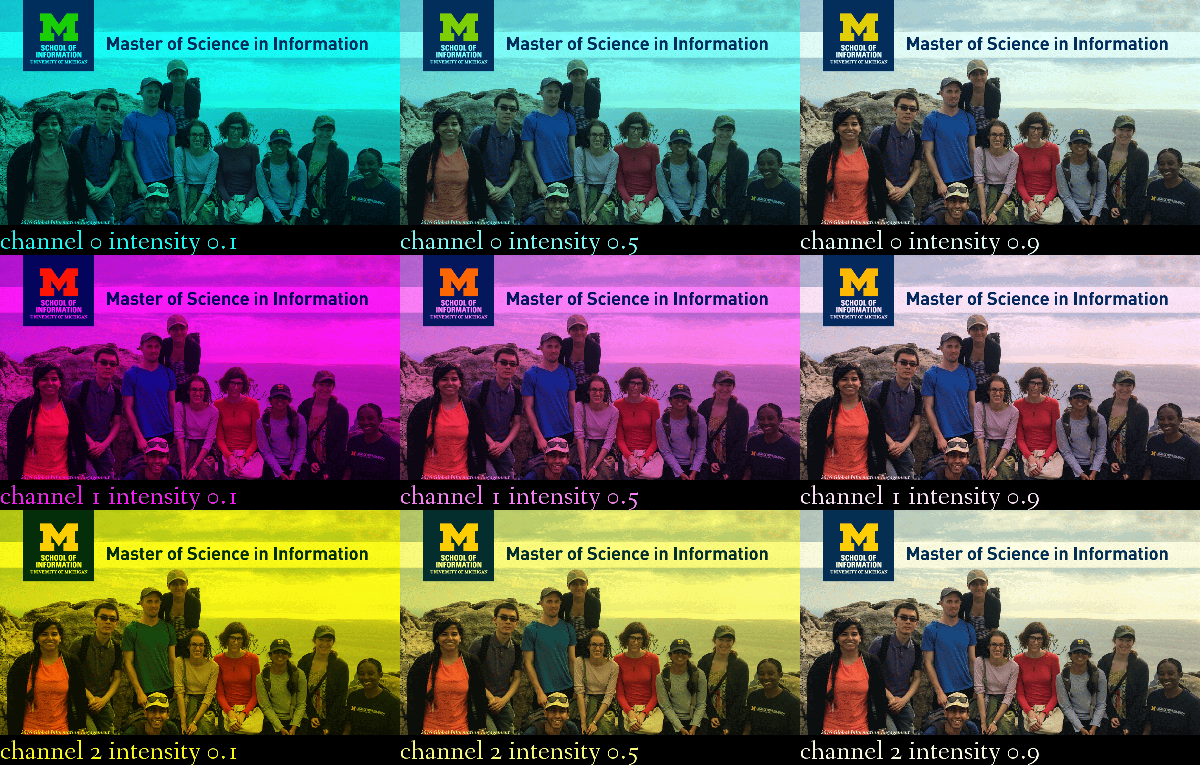

In [7]:
#creating a contact sheet
first_image=final[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in final:

    contact_sheet.paste(img, (x, y) )
   
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)